In [3]:
import scipy
import csv
import pandas as p
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
sns.set(style="white")

In [65]:
data = p.read_csv('pima-indians-diabetes.csv', delimiter=',')

In [66]:
data.head()

,NumberOfTimesPregnant,PlasmaGlucose,DiastolicBloodPressure,TricepsSkinFoldThickness,2HrSerumInsulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
data['Class'].value_counts()   #Gives us the Class Distibution of the DataSet

0    500
1    268
Name: Class, dtype: int64

In [68]:
#Basic Statistics for Various Columns
notp1 = data[data['Class'] == 1]['NumberOfTimesPregnant']
notp1.describe()

count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: NumberOfTimesPregnant, dtype: float64

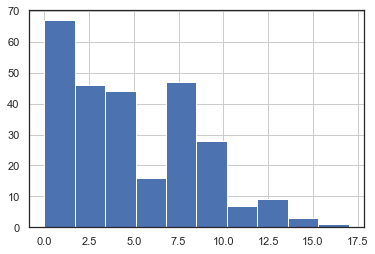

In [69]:
bi_nopt1 = data[data['Class'] == 1]
bi_nopt1['NumberOfTimesPregnant'].hist()

In [70]:
notp0 = data[data['Class'] == 0]['NumberOfTimesPregnant']
notp0.describe()

count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: NumberOfTimesPregnant, dtype: float64

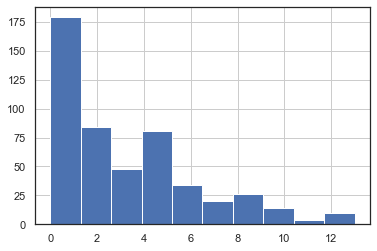

In [71]:
bi_nopt0 = data[data['Class'] == 0]
bi_nopt0['NumberOfTimesPregnant'].hist()

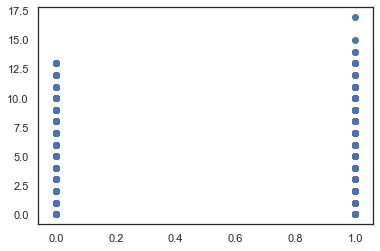

In [72]:
#Scatterplot
plt.scatter(data['Class'],data['NumberOfTimesPregnant'])

In [73]:
#Description of the attributes:
data['NumberOfTimesPregnant'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: NumberOfTimesPregnant, dtype: float64

In [74]:
data['PlasmaGlucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: PlasmaGlucose, dtype: float64

In [75]:
data['DiastolicBloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: DiastolicBloodPressure, dtype: float64

In [76]:
data['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [77]:
data['2HrSerumInsulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: 2HrSerumInsulin, dtype: float64

In [78]:
data['TricepsSkinFoldThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: TricepsSkinFoldThickness, dtype: float64

In [79]:
data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [80]:
data['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [81]:
corr = data.corr()
data.corr()

,NumberOfTimesPregnant,PlasmaGlucose,DiastolicBloodPressure,TricepsSkinFoldThickness,2HrSerumInsulin,BMI,DiabetesPedigreeFunction,Age,Class
NumberOfTimesPregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlasmaGlucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
DiastolicBloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
TricepsSkinFoldThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
2HrSerumInsulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


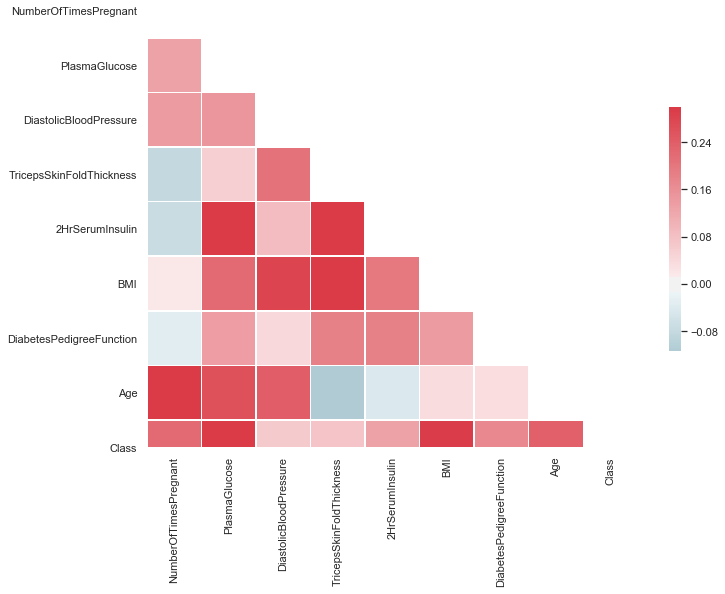

In [82]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [83]:
#p.scatter_matrix(data, alpha=0.2, diagonal='kde')

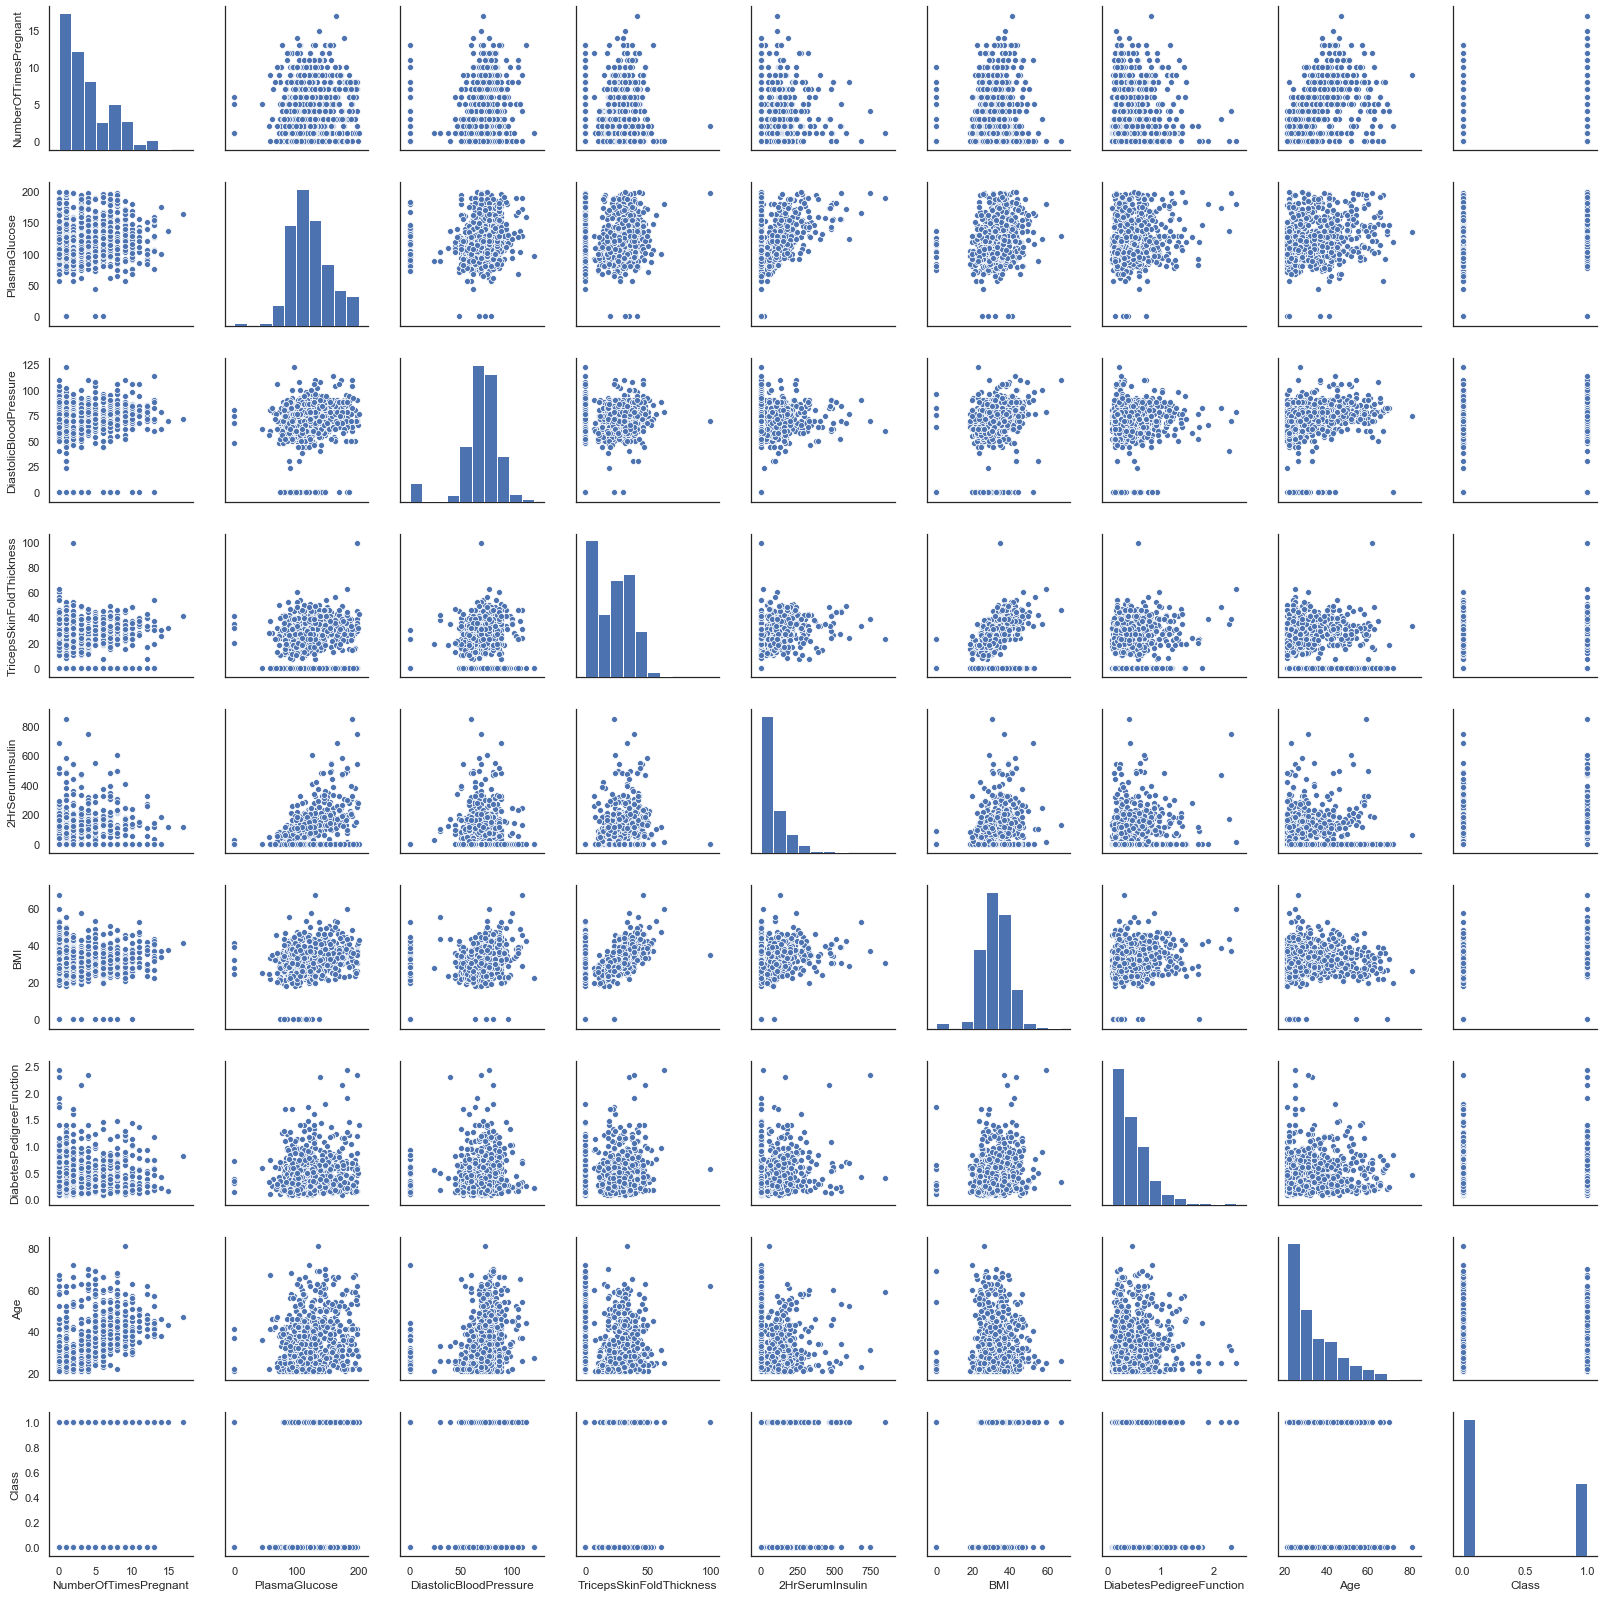

In [84]:
sns.pairplot(data)

In [85]:
X = data.values[:, 0:7]
Y = data.values[:,8]
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)


In [86]:
# Decision Tree Algorithm
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [87]:
from sklearn import metrics
print(clf_gini.feature_importances_)

[0.07899667 0.33348114 0.09027654 0.05028552 0.08185765 0.22835192
 0.13675055]


In [88]:
scipy.stats.chisquare(X)

Power_divergenceResult(statistic=array([  2264.87470369,   6485.524605  ,   4158.20140184,   9504.12072026,
       127653.2782691 ,   1490.24275284,    178.43704987]), pvalue=array([1.25441580e-147, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 8.07000248e-049, 1.00000000e+000]))

In [89]:
trainingtest = clf_gini.predict(x_test)

In [90]:
accuracy_score(y_test, trainingtest)

0.6883116883116883

In [91]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [92]:
trainingtestentropy = clf_entropy.predict(x_test)

In [93]:
accuracy_score(y_test, trainingtestentropy)

0.6883116883116883

In [94]:
#Decision tree with k fold cross validation
cv_results = cross_val_score(clf_gini, x_train, y_train, cv=10)

In [95]:
print(cv_results)

[0.77419355 0.77419355 0.72580645 0.72580645 0.74193548 0.67213115
 0.7704918  0.68852459 0.63934426 0.78333333]


In [96]:
np.mean(cv_results)

0.729576062048299

In [97]:
#Naive Bayes Algorithm
gnb = GaussianNB()
x_testing = gnb.fit(x_train, y_train).predict(x_test)

In [98]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0],(y_test != x_testing).sum()))

Number of mislabeled points out of a total 154 points : 48


In [99]:
accuracy_score(y_test,x_testing)

0.6883116883116883

In [100]:
#knearest neighbors with 10 fold cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
knn_cv.best_params_

{'n_neighbors': 30}

In [102]:
knn_cv.best_score_

0.749185667752443

In [103]:
yhat = knn_cv.predict(x_test)

In [104]:
yhat.std()

0.4057272558912547

In [105]:
accuracy_score(y_test,yhat)

0.7077922077922078

In [106]:
# Ensemble method: Bagging(Bootstrap Aggregating) bootstrap set to default as True
from sklearn.ensemble import BaggingClassifier
bagging1 = BaggingClassifier(knn_cv, max_samples=0.5, max_features=1)

In [107]:
bagging1.fit(x_train,y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=10,
                                              error_score='raise-deprecating',
                                              estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=5,
                                                                             p=2,
                                                                             weights='uniform'),
                                              iid='warn', n_jobs=None,
                                              param_grid

In [108]:
yhatensemble = bagging1.predict(x_test)

In [109]:
#Accuracy on the test set
accuracy_score(y_test,yhatensemble)

0.6428571428571429

In [110]:
yhaten = bagging1.predict(X)

In [111]:
#Accuracy on the whole set
accuracy_score(Y,yhaten)

0.68359375

In [112]:
#ensemble method: Stacking
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier


In [113]:
clf1 = KNeighborsClassifier(n_neighbors=30) # As we got 30 to be the best number of neighbors in the above statements
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],['KNN','Random Forest','Naive Bayes','StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.75 (+/- 0.04) [KNN]
Accuracy: 0.74 (+/- 0.05) [Random Forest]
Accuracy: 0.77 (+/- 0.04) [Naive Bayes]
Accuracy: 0.74 (+/- 0.05) [StackingClassifier]


In [114]:
#ensemble method: Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier
clfAda = AdaBoostClassifier(n_estimators=100)
scoresAda = cross_val_score(clfAda, x_train, y_train)
scoresAda.mean()

0.7508050374621393

In [115]:
#predicting on test set and then comparing it with original label
clfAda.fit(x_train,y_train)
yhatada = clfAda.predict(x_test)
accuracy_score(y_test, yhatada)

0.6948051948051948

In [116]:
#on the complete data set accuracy
scoresAda1 = cross_val_score(clfAda,X,Y)
scoresAda1.mean()

0.7448094291218433